In [1]:
from sqlalchemy import create_engine
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import pandas as pd
import scipy
import scipy.stats
import numpy as np

In [2]:
def sensor_summary(this_sensor_df):
    # def sensor_summary(this_sensor_df):
    ### Gathering data for the last month
    this_house_sensor = this_sensor_df.reset_index()

    ### Adding dates so that the function works
    this_house_sensor['date'] = this_house_sensor['timestamp'].dt.date
    last_date = datetime.now() - timedelta(days=30)
    test_var =  this_house_sensor[this_house_sensor['timestamp'] >= last_date.date()]

    if len(test_var['index']) > 0:
        data_last_month  = this_house_sensor[this_house_sensor['timestamp'] >= last_date.date()]

        #Last Day Collected
        last_day = data_last_month['date'][len(data_last_month['date'])-1]

        # Number of Days in Sample
        ndays = len(data_last_month['date'].unique())

        # Number of Samples
        nsamples = len(data_last_month['value'])

        # Count number of NA samples
        count = 0
        for sample in data_last_month['value']:
            if pd.isnull(sample) == True: 
                count += 1

        # Interquartile range
        sum_stats = data_last_month['value'].describe()

        print("Sensor ID is " + str(data_last_month['sensor_id'].unique()[0]))
        print("Sensor Type is " + str(characteris[characteris['sensor_id'] == str(this_house_sensor['sensor_id'].unique()[0])]['type'].reset_index()['type'][0]))
        print("Sensor Type is " + str(data_last_month['sensor_id'].unique()[0]))
        print("Last Date: " + str(last_day))
        print("Number of days in sample: " + str(ndays))
        print("Number of samples: " + str(nsamples))
        print("Number of NAs: " + str(count))
        print(sum_stats)

    else: 
        print("Warning! " + str(this_house_sensor['sensor_id'].unique()[0]) + " doesn't have any data!")
        

    return(data_last_month)


In [3]:
#Connection to Server to get household luzero data
#Database connection to luzero_server for use in db access
url = 'postgresql://{}:{}@{}:{}/{}'
url = url.format('luzero', 'luzero', 'luzero.niuera.co', 5432, 'luzero_server')
con_total = create_engine(url, client_encoding='utf8')

In [4]:
# Create engine
# Write this in terminal first:
# ssh -N db.xinampa.io -L 5433:127.0.0.1:5432 &

engine = create_engine('postgresql://diego@localhost:5433/sonora_sensors')

In [4]:
# Tables in Hermosillo are
#hermosillo_weather (columns:  local_timestamp       |    obs_timestamp    | wind_speed | humidity | temperature | temperature_max | temperature_min |    sunrise_time     |     sunset_time )
# and houses where we've installed sensors
#taqueria

In [5]:
########## Weather Data
########## 
########## 

In [9]:
df_total = pd.read_sql("select * from hermosillo_weather order by obs_timestamp desc limit 10000",engine)

In [10]:
df_total_sort = df_total.sort_values(by= 'obs_timestamp', ascending= False)
df_total_sort['date'] = df_total_sort['obs_timestamp'].dt.date

In [11]:
### Gathering data for the last month
last_date = datetime.now() - timedelta(days=30)

weather_last_month  = df_total_sort[df_total_sort['obs_timestamp'] >= last_date.date()]

#Last Day Collected
last_day = weather_last_month['date'][len(weather_last_month['date'])-1]

# Number of Days in Sample
ndays = len(weather_last_month['date'].unique())

# Number of Samples
nsamples = len(weather_last_month['temperature'])

# Count number of NA samples
count = 0
for sample in weather_last_month['temperature']:
    if pd.isnull(sample) == True: 
        count += 1
        
# Interquartile range
sum_stats = weather_last_month['temperature'].describe()

print("Last Date: " + str(last_day))
print("Number of days in sample: " + str(ndays))
print("Number of samples: " + str(nsamples))
print("Number of NAs: " + str(count))
print(sum_stats)

Last Date: 2019-06-05
Number of days in sample: 31
Number of samples: 9398
Number of NAs: 0
count    9398.000000
mean       30.532507
std         6.257696
min        16.530000
25%        25.750000
50%        30.690000
75%        35.810000
max        44.340000
Name: temperature, dtype: float64


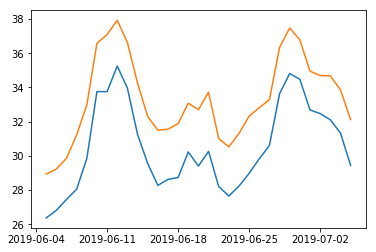

In [12]:
# Last Thirty Days
plt.plot(weather_last_month.groupby('date')['temperature'].mean())
plt.plot(weather_last_month.groupby('date')['temperature_max'].mean())

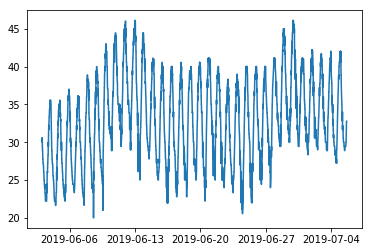

In [13]:
plt.plot(df_total_sort['obs_timestamp'],df_total_sort['temperature_max'])
plt.show()

In [14]:
##### Senor Data Analysis

#Sensor list
house_sensors = {}
house_sensors['id_1']= ("FCFE","C602","F991")
house_sensors['id_10'] = ("FE44","C2D5","FCE4")
house_sensors['id_9'] = ("EF2C","CF17","F33E")
house_sensors['id_20'] = ("0581","C40B","F9D1")
house_sensors['id_3'] = ("FAF4","C41B","FF88")
house_sensors['id_4'] = ("F99E","C44A","F9E0")
house_sensors['id_11'] = ("FFB9","C462","FE40")
house_sensors['id_12'] = ("FAF2","C46A","F9E2")
house_sensors['id_5'] = ("FF89","C2DF","C61E","0574","0556")
house_sensors['id_8'] = ("05C5","C450","F731")
house_sensors['id_16'] = ("FADD","F32C","C461","C46D","054D")
house_sensors['id_17'] = ("FCA1","FA8B","C60D","C445","FE5A")
house_sensors['id_13'] = ("F9B3","C411","FAE9")
house_sensors['id_19'] = ("FCD0","C2FE","C622","F5DF","FE2C")
house_sensors['id_18'] = ("FAFD","C441","FE0B")
house_sensors['id_7'] = ("C401","FCC9","C649","FE29","FFC3")
house_sensors['id_14'] = ("C43B","F5BF","FFA6")
house_sensors['id_15'] = ("C612","F995","FE01")

house_list = list(house_sensors.keys())

In [15]:
#Sensor Type List
sensor_type = {}
sensor_type['id_1']= ("living_temp","living_energy","ambient_temp")
sensor_type['id_10'] = ("ambient_temp","living_energy","living_temp")
sensor_type['id_9'] = ("ambient_temp","room_energy","room_temp")
sensor_type['id_20'] = ("ambient_temp","living_energy","living_temp")
sensor_type['id_3'] = ("ambient_temp","living_energy","living_temp")
sensor_type['id_4'] = ("living_temp","living_energy","ambient_temp")
sensor_type['id_11'] = ("ambient_temp","room_energy","room_temp")
sensor_type['id_12'] = ("room_temp","room_energy","ambient_temp")
sensor_type['id_5'] = ("living_temp","room_energy","living_energy","room_temp","ambient_temp")
sensor_type['id_8'] = ("living_temp","living_energy","ambient_temp")
sensor_type['id_16'] = ("ambient_temp","room_temp","living_energy","room_energy","living_temp")
sensor_type['id_17'] = ("living_temp","ambient_temp","living_energy","room_energy","room_temp")
sensor_type['id_13'] = ("room_temp","room_energy","ambient_temp")
sensor_type['id_19'] = ("living_temp","room_energy","living_energy","ambient_temp","room_temp")
sensor_type['id_18'] = ("room_temp","room_energy","ambient_temp")
sensor_type['id_7'] = ("living_energy","living_temp","room_energy","room_temp","ambient_temp")
sensor_type['id_14'] = ("room_energy","room_temp","ambient_temp")
sensor_type['id_15'] = ("living_energy","living_temp","ambient_temp")

In [17]:
##### Senor Data Analysis


#df_total = pd.read_sql("SELECT DISTINCT ON (index,timestamp, value, sensor_type_id) * FROM id_9 order by timestamp;",engine)


###1. Delete duplicates in postgres! CHECK TABLES!


    
    
HOUSE ID id_1
    
Sensor ID is FCFE
Sensor Type is living_temp
Sensor Type is FCFE
Last Date: 2019-06-01
Number of days in sample: 26
Number of samples: 147964
Number of NAs: 0
count    147964.000000
mean         29.799813
std           1.191602
min          25.625000
25%          28.937500
50%          29.687500
75%          30.625000
max          33.750000
Name: value, dtype: float64
Sensor ID is F991
Sensor Type is ambient_temp
Sensor Type is F991
Last Date: 2019-06-01
Number of days in sample: 26
Number of samples: 148007
Number of NAs: 0
count    148007.000000
mean         29.854206
std           1.222190
min          25.250000
25%          28.937500
50%          29.750000
75%          30.687500
max          34.312500
Name: value, dtype: float64


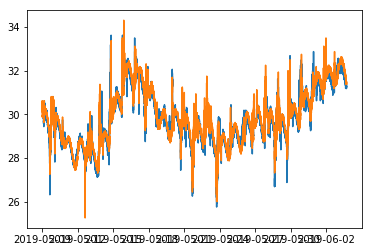

    
    
HOUSE ID id_10
    
Sensor ID is FCE4
Sensor Type is living_temp
Sensor Type is FCE4
Last Date: 2019-05-31
Number of days in sample: 26
Number of samples: 148122
Number of NAs: 0
count    148122.000000
mean         28.470944
std           2.489588
min          13.125000
25%          26.812500
50%          28.500000
75%          30.125000
max          34.625000
Name: value, dtype: float64
Sensor ID is FE44
Sensor Type is ambient_temp
Sensor Type is FE44
Last Date: 2019-05-26
Number of days in sample: 21
Number of samples: 116006
Number of NAs: 0
count    116006.000000
mean         27.355074
std           2.177785
min          22.125000
25%          25.812500
50%          27.062500
75%          28.562500
max          34.937500
Name: value, dtype: float64


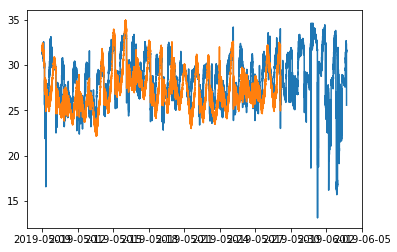

    
    
HOUSE ID id_9
    
Sensor ID is F33E
Sensor Type is room_temp
Sensor Type is F33E
Last Date: 2019-06-01
Number of days in sample: 26
Number of samples: 148232
Number of NAs: 0
count    148232.000000
mean         24.799746
std           5.853518
min           3.750000
25%          23.687500
50%          25.687500
75%          28.312500
max          34.375000
Name: value, dtype: float64
Sensor ID is EF2C
Sensor Type is ambient_temp
Sensor Type is EF2C
Last Date: 2019-06-01
Number of days in sample: 26
Number of samples: 148186
Number of NAs: 0
count    148186.000000
mean         26.934824
std           1.672540
min          23.375000
25%          25.750000
50%          26.812500
75%          27.875000
max          32.500000
Name: value, dtype: float64


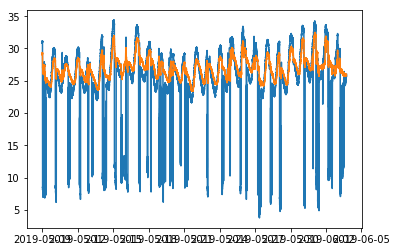

    
    
HOUSE ID id_20
    
Sensor ID is F9D1
Sensor Type is living_temp
Sensor Type is F9D1
Last Date: 2019-06-01
Number of days in sample: 26
Number of samples: 148335
Number of NAs: 0
count    148335.000000
mean         25.363707
std           3.796169
min          12.000000
25%          24.812500
50%          26.625000
75%          27.937500
max          31.062500
Name: value, dtype: float64
Sensor ID is 0581
Sensor Type is ambient_temp
Sensor Type is 0581
Last Date: 2019-06-01
Number of days in sample: 26
Number of samples: 148355
Number of NAs: 0
count    148355.000000
mean         27.614085
std           1.051659
min          24.187500
25%          26.875000
50%          27.625000
75%          28.375000
max          31.250000
Name: value, dtype: float64


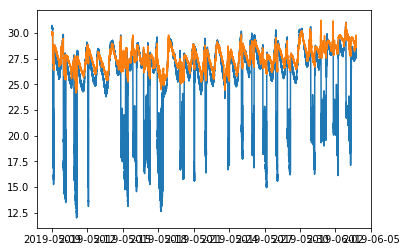

    
    
HOUSE ID id_3
    
Sensor ID is FF88
Sensor Type is living_temp
Sensor Type is FF88
Last Date: 2019-06-01
Number of days in sample: 26
Number of samples: 148459
Number of NAs: 0
count    148459.000000
mean         28.155213
std           1.695984
min           8.812500
25%          27.500000
50%          28.187500
75%          29.000000
max          31.562500
Name: value, dtype: float64
Sensor ID is FAF4
Sensor Type is ambient_temp
Sensor Type is FAF4
Last Date: 2019-06-01
Number of days in sample: 26
Number of samples: 148442
Number of NAs: 0
count    148442.000000
mean         28.010727
std           0.907417
min          25.062500
25%          27.312500
50%          27.937500
75%          28.562500
max          33.500000
Name: value, dtype: float64


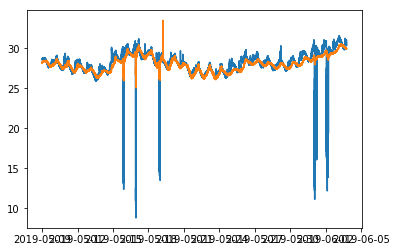

    
    
HOUSE ID id_4
    
Sensor ID is F99E
Sensor Type is living_temp
Sensor Type is F99E
Last Date: 2019-05-31
Number of days in sample: 26
Number of samples: 148502
Number of NAs: 0
count    148502.000000
mean         28.212388
std           4.015735
min          11.000000
25%          28.500000
50%          29.250000
75%          30.062500
max          34.625000
Name: value, dtype: float64
Sensor ID is F9E0
Sensor Type is ambient_temp
Sensor Type is F9E0
Last Date: 2019-05-31
Number of days in sample: 26
Number of samples: 148521
Number of NAs: 0
count    148521.000000
mean         28.225652
std           1.727568
min          20.750000
25%          27.750000
50%          28.562500
75%          29.312500
max          31.562500
Name: value, dtype: float64


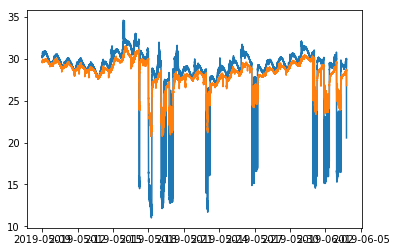

    
    
HOUSE ID id_11
    
Sensor ID is FE40
Sensor Type is room_temp
Sensor Type is FE40
Last Date: 2019-06-01
Number of days in sample: 26
Number of samples: 148611
Number of NAs: 0
count    148611.000000
mean         24.112148
std           7.063428
min           7.812500
25%          15.750000
50%          27.500000
75%          29.625000
max          32.000000
Name: value, dtype: float64
Sensor ID is FFB9
Sensor Type is ambient_temp
Sensor Type is FFB9
Last Date: 2019-06-01
Number of days in sample: 26
Number of samples: 148593
Number of NAs: 0
count    148593.000000
mean         27.921311
std           1.535869
min          23.187500
25%          26.937500
50%          28.187500
75%          29.000000
max          31.125000
Name: value, dtype: float64


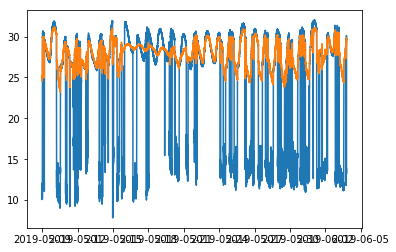

    
    
HOUSE ID id_12
    
Sensor ID is FAF2
Sensor Type is room_temp
Sensor Type is FAF2
Last Date: 2019-06-01
Number of days in sample: 26
Number of samples: 148656
Number of NAs: 0
count    148656.000000
mean         28.317343
std           1.910191
min          19.187500
25%          26.937500
50%          28.375000
75%          29.625000
max          33.750000
Name: value, dtype: float64
Sensor ID is F9E2
Sensor Type is ambient_temp
Sensor Type is F9E2
Last Date: 2019-06-01
Number of days in sample: 26
Number of samples: 148639
Number of NAs: 0
count    148639.000000
mean         28.213885
std           1.495007
min          21.625000
25%          27.187500
50%          28.312500
75%          29.312500
max          31.937500
Name: value, dtype: float64


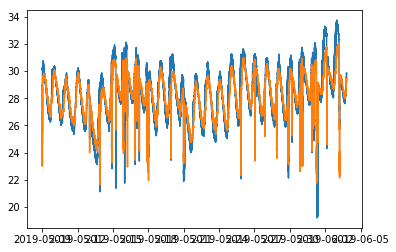

    
    
HOUSE ID id_5
    
Sensor ID is FF89
Sensor Type is living_temp
Sensor Type is FF89
Last Date: 2019-06-02
Number of days in sample: 26
Number of samples: 148815
Number of NAs: 0
count    148815.000000
mean         28.008046
std           1.871258
min           6.125000
25%          27.187500
50%          28.062500
75%          28.937500
max          33.250000
Name: value, dtype: float64
Sensor ID is 0556
Sensor Type is ambient_temp
Sensor Type is 0556
Last Date: 2019-05-16
Number of days in sample: 9
Number of samples: 50675
Number of NAs: 0
count    50675.000000
mean        27.345545
std          1.284247
min         24.562500
25%         26.437500
50%         27.312500
75%         28.250000
max         30.375000
Name: value, dtype: float64
Sensor ID is 0574
Sensor Type is room_temp
Sensor Type is 0574
Last Date: 2019-06-02
Number of days in sample: 26
Number of samples: 148835
Number of NAs: 0
count    148835.000000
mean         28.163723
std           2.994454
min         

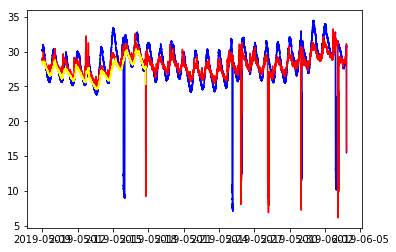

    
    
HOUSE ID id_8
    
Sensor ID is 05C5
Sensor Type is living_temp
Sensor Type is 05C5
Last Date: 2019-06-01
Number of days in sample: 26
Number of samples: 148942
Number of NAs: 0
count    148942.000000
mean         29.795584
std           2.750991
min          17.250000
25%          28.375000
50%          30.062500
75%          31.500000
max          36.750000
Name: value, dtype: float64
Sensor ID is F731
Sensor Type is ambient_temp
Sensor Type is F731
Last Date: 2019-06-01
Number of days in sample: 26
Number of samples: 148959
Number of NAs: 0
count    148959.000000
mean         29.457045
std           2.844428
min          21.875000
25%          27.250000
50%          29.250000
75%          31.500000
max          37.187500
Name: value, dtype: float64


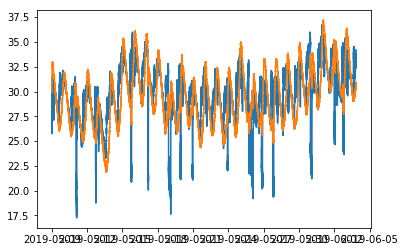

    
    
HOUSE ID id_16
    
Sensor ID is 054D
Sensor Type is living_temp
Sensor Type is 054D
Last Date: 2019-06-02
Number of days in sample: 26
Number of samples: 149425
Number of NAs: 0
count    149425.000000
mean         29.110678
std           2.524605
min          14.625000
25%          28.625000
50%          29.437500
75%          30.375000
max          34.687500
Name: value, dtype: float64
Sensor ID is FADD
Sensor Type is ambient_temp
Sensor Type is FADD
Last Date: 2019-06-02
Number of days in sample: 26
Number of samples: 149410
Number of NAs: 0
count    149410.000000
mean         29.410813
std           1.095169
min          25.187500
25%          28.687500
50%          29.312500
75%          30.125000
max          32.750000
Name: value, dtype: float64
Sensor ID is F32C
Sensor Type is room_temp
Sensor Type is F32C
Last Date: 2019-06-02
Number of days in sample: 26
Number of samples: 149443
Number of NAs: 0
count    149443.000000
mean         25.187685
std           5.796772
m

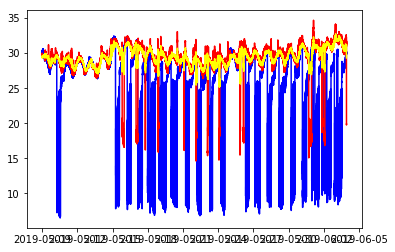

    
    
HOUSE ID id_17
    
Sensor ID is FCA1
Sensor Type is living_temp
Sensor Type is FCA1
Last Date: 2019-06-02
Number of days in sample: 26
Number of samples: 149517
Number of NAs: 0
count    149517.000000
mean         26.721802
std           4.091561
min           9.187500
25%          26.812500
50%          27.937500
75%          28.875000
max          34.000000
Name: value, dtype: float64
Sensor ID is FA8B
Sensor Type is ambient_temp
Sensor Type is FA8B
Last Date: 2019-06-02
Number of days in sample: 26
Number of samples: 149535
Number of NAs: 0
count    149535.000000
mean         27.648818
std           0.807888
min          24.875000
25%          27.125000
50%          27.562500
75%          28.125000
max          30.937500
Name: value, dtype: float64
Sensor ID is FE5A
Sensor Type is room_temp
Sensor Type is FE5A
Last Date: 2019-06-02
Number of days in sample: 26
Number of samples: 149557
Number of NAs: 0
count    149557.000000
mean         28.275907
std           4.005733
m

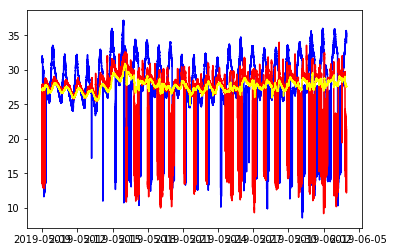

    
    
HOUSE ID id_13
    
Sensor ID is F9B3
Sensor Type is room_temp
Sensor Type is F9B3
Last Date: 2019-06-01
Number of days in sample: 26
Number of samples: 149747
Number of NAs: 0
count    149747.000000
mean         28.630832
std           3.089595
min           9.625000
25%          27.125000
50%          28.625000
75%          30.625000
max          35.062500
Name: value, dtype: float64
Sensor ID is FAE9
Sensor Type is ambient_temp
Sensor Type is FAE9
Last Date: 2019-06-01
Number of days in sample: 26
Number of samples: 149732
Number of NAs: 0
count    149732.000000
mean         28.949601
std           1.938622
min          23.625000
25%          27.562500
50%          28.812500
75%          30.250000
max          34.062500
Name: value, dtype: float64


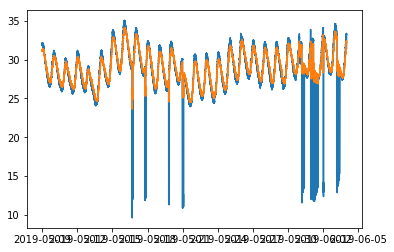

    
    
HOUSE ID id_19
    
Sensor ID is FCD0
Sensor Type is living_temp
Sensor Type is FCD0
Last Date: 2019-06-02
Number of days in sample: 27
Number of samples: 149860
Number of NAs: 0
count    149860.000000
mean         29.145963
std           2.174628
min           7.000000
25%          28.437500
50%          29.375000
75%          30.187500
max          33.125000
Name: value, dtype: float64
Sensor ID is F5DF
Sensor Type is ambient_temp
Sensor Type is F5DF
Last Date: 2019-06-02
Number of days in sample: 27
Number of samples: 149878
Number of NAs: 0
count    149878.000000
mean         29.157253
std           1.096801
min          24.437500
25%          28.250000
50%          29.125000
75%          29.937500
max          33.687500
Name: value, dtype: float64
Sensor ID is FE2C
Sensor Type is room_temp
Sensor Type is FE2C
Last Date: 2019-06-02
Number of days in sample: 27
Number of samples: 149897
Number of NAs: 0
count    149897.000000
mean         28.567646
std           2.733257
m

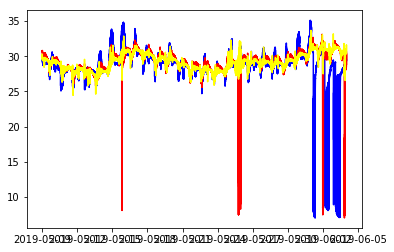

    
    
HOUSE ID id_18
    
Sensor ID is FAFD
Sensor Type is room_temp
Sensor Type is FAFD
Last Date: 2019-06-02
Number of days in sample: 27
Number of samples: 150044
Number of NAs: 0
count    150044.000000
mean         27.867491
std           3.996560
min           6.125000
25%          26.625000
50%          28.312500
75%          30.312500
max          35.000000
Name: value, dtype: float64
Sensor ID is FE0B
Sensor Type is ambient_temp
Sensor Type is FE0B
Last Date: 2019-06-02
Number of days in sample: 27
Number of samples: 150060
Number of NAs: 0
count    150060.000000
mean         27.724210
std           2.059232
min          19.812500
25%          26.625000
50%          27.875000
75%          28.937500
max          34.000000
Name: value, dtype: float64


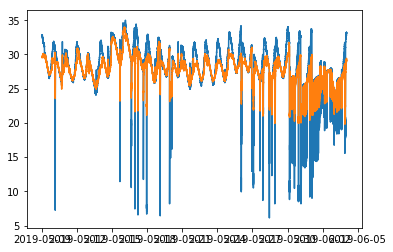

    
    
HOUSE ID id_7
    
Sensor ID is FCC9
Sensor Type is living_temp
Sensor Type is FCC9
Last Date: 2019-06-03
Number of days in sample: 27
Number of samples: 153822
Number of NAs: 0
count    153822.000000
mean         26.939163
std           3.646573
min           6.062500
25%          25.375000
50%          27.187500
75%          29.125000
max          33.937500
Name: value, dtype: float64
Sensor ID is FFC3
Sensor Type is ambient_temp
Sensor Type is FFC3
Last Date: 2019-06-03
Number of days in sample: 27
Number of samples: 153855
Number of NAs: 0
count    153855.000000
mean         26.663340
std           1.676135
min          21.937500
25%          25.500000
50%          26.750000
75%          27.750000
max          32.187500
Name: value, dtype: float64
Sensor ID is FE29
Sensor Type is room_temp
Sensor Type is FE29
Last Date: 2019-06-03
Number of days in sample: 27
Number of samples: 153885
Number of NAs: 0
count    153885.000000
mean         22.868664
std           6.427890
mi

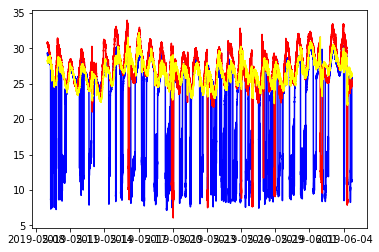

    
    
HOUSE ID id_14
    
Sensor ID is F5BF
Sensor Type is room_temp
Sensor Type is F5BF
Last Date: 2019-06-02
Number of days in sample: 27
Number of samples: 153546
Number of NAs: 0
count    153546.000000
mean         26.583381
std           5.539948
min           5.625000
25%          27.062500
50%          28.312500
75%          29.375000
max          33.687500
Name: value, dtype: float64
Sensor ID is FFA6
Sensor Type is ambient_temp
Sensor Type is FFA6
Last Date: 2019-06-02
Number of days in sample: 27
Number of samples: 153574
Number of NAs: 0
count    153574.000000
mean         28.257946
std           1.609960
min          22.125000
25%          27.250000
50%          28.312500
75%          29.375000
max          32.562500
Name: value, dtype: float64


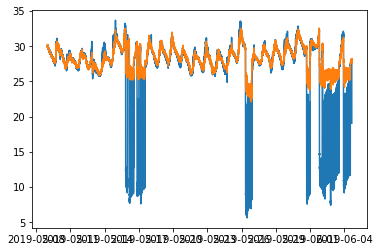

    
    
HOUSE ID id_15
    
Sensor ID is F995
Sensor Type is living_temp
Sensor Type is F995
Last Date: 2019-06-03
Number of days in sample: 27
Number of samples: 153672
Number of NAs: 0
count    153672.000000
mean         26.531601
std           6.722369
min           3.687500
25%          27.125000
50%          28.500000
75%          29.812500
max          33.937500
Name: value, dtype: float64
Sensor ID is FE01
Sensor Type is ambient_temp
Sensor Type is FE01
Last Date: 2019-06-03
Number of days in sample: 27
Number of samples: 153699
Number of NAs: 0
count    153699.000000
mean         29.431234
std           2.220858
min          23.125000
25%          27.812500
50%          29.375000
75%          30.812500
max          36.937500
Name: value, dtype: float64


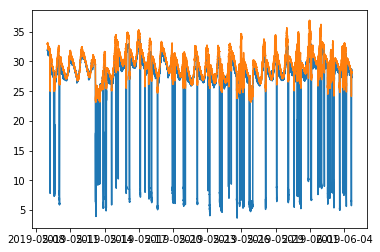

In [314]:
for house_id in house_list:
     # for house_id in house_list:
    df_total = pd.read_sql("SELECT DISTINCT ON (index,timestamp, value, sensor_type_id) * FROM " + house_id + " order by timestamp;",engine)

    #Get house 
    this_house_df = df_total
    house_sensors_list = house_sensors[this_house_df['house_name'].unique()[0]]
    sensor_type_list = sensor_type[this_house_df['house_name'].unique()[0]]

    characteris = pd.DataFrame([house_sensors_list,sensor_type_list]).T
    characteris.columns = ['sensor_id','type']

    print("    ")
    print("    ")
    print("HOUSE ID " + str(this_house_df['house_name'].unique()[0]))
    print("    ")

    if len(sensor_type_list) == 3:
        if 'room_energy' in sensor_type_list:
            room_energy_str = characteris[characteris['type'] == 'room_energy']['sensor_id'].reset_index()['sensor_id'][0]
            room_temp_str = characteris[characteris['type'] == 'room_temp']['sensor_id'].reset_index()['sensor_id'][0]
            ambient_temp_str = characteris[characteris['type'] == 'ambient_temp']['sensor_id'].reset_index()['sensor_id'][0]

            room_energy_df = this_house_df[(this_house_df['sensor_id'] == room_energy_str)].drop_duplicates(subset=['timestamp','value'])
            room_temp_df = this_house_df[(this_house_df['sensor_id'] == room_temp_str)].drop_duplicates(subset=['timestamp','value'])
            ambient_temp_df = this_house_df[(this_house_df['sensor_id'] == ambient_temp_str)].drop_duplicates(subset=['timestamp','value'])

            #Implement Summary Function
            if len(room_energy_df['index']) >0:
                sensor_summary(room_energy_df)
            room_temp_df_plot = sensor_summary(room_temp_df)
            ambient_temp_df_plot = sensor_summary(ambient_temp_df)

            plt.clf()
            plt.plot(room_temp_df_plot['timestamp'],room_temp_df_plot['value'])
            plt.plot(ambient_temp_df_plot['timestamp'],ambient_temp_df_plot['value'])
            plt.show()

        else:
            living_energy_str = characteris[characteris['type'] == 'living_energy']['sensor_id'].reset_index()['sensor_id'][0]
            living_temp_str = characteris[characteris['type'] == 'living_temp']['sensor_id'].reset_index()['sensor_id'][0]
            ambient_temp_str = characteris[characteris['type'] == 'ambient_temp']['sensor_id'].reset_index()['sensor_id'][0]

            living_energy_df = this_house_df[(this_house_df['sensor_id'] == living_energy_str)].drop_duplicates(subset=['timestamp','value'])
            living_temp_df = this_house_df[(this_house_df['sensor_id'] == living_temp_str)].drop_duplicates(subset=['timestamp','value'])
            ambient_temp_df = this_house_df[(this_house_df['sensor_id'] == ambient_temp_str)].drop_duplicates(subset=['timestamp','value'])

            #Implement Summary Function
            if len(living_energy_df['index']) >0:
                sensor_summary(living_energy_df)
            living_temp_df_plot = sensor_summary(living_temp_df)
            ambient_temp_df_plot = sensor_summary(ambient_temp_df)

            plt.clf()
            plt.plot(living_temp_df_plot['timestamp'],living_temp_df_plot['value'])
            plt.plot(ambient_temp_df_plot['timestamp'],ambient_temp_df_plot['value'])
            plt.show()

    else:
        living_energy_str = characteris[characteris['type'] == 'living_energy']['sensor_id'].reset_index()['sensor_id'][0]
        living_temp_str = characteris[characteris['type'] == 'living_temp']['sensor_id'].reset_index()['sensor_id'][0]
        room_energy_str = characteris[characteris['type'] == 'room_energy']['sensor_id'].reset_index()['sensor_id'][0]
        room_temp_str = characteris[characteris['type'] == 'room_temp']['sensor_id'].reset_index()['sensor_id'][0]
        ambient_temp_str = characteris[characteris['type'] == 'ambient_temp']['sensor_id'].reset_index()['sensor_id'][0]

        room_energy_df = this_house_df[(this_house_df['sensor_id'] == room_energy_str)].drop_duplicates(subset=['timestamp','value'])
        room_temp_df = this_house_df[(this_house_df['sensor_id'] == room_temp_str)].drop_duplicates(subset=['timestamp','value'])
        living_energy_df = this_house_df[(this_house_df['sensor_id'] == living_energy_str)].drop_duplicates(subset=['timestamp','value'])
        living_temp_df = this_house_df[(this_house_df['sensor_id'] == living_temp_str)].drop_duplicates(subset=['timestamp','value'])
        ambient_temp_df = this_house_df[(this_house_df['sensor_id'] == ambient_temp_str)].drop_duplicates(subset=['timestamp','value'])


        #Implement Summary Function
        if len(living_energy_df['index']) >0:
            living_energy_df_plot = sensor_summary(living_energy_df)
            room_energy_df_plot =sensor_summary(room_energy_df)
        living_temp_df_plot = sensor_summary(living_temp_df)
        ambient_temp_df_plot = sensor_summary(ambient_temp_df)
        room_temp_df_plot = sensor_summary(room_temp_df)

        plt.clf()
        plt.plot(room_temp_df_plot['timestamp'],room_temp_df_plot['value'],color='blue')
        plt.plot(living_temp_df_plot['timestamp'],living_temp_df_plot['value'],color='red')
        plt.plot(ambient_temp_df_plot['timestamp'],ambient_temp_df_plot['value'],color='yellow')
        plt.show()

In [13]:
### Creating an output of CSV Files

df_energy_list = []
for house_id in house_list:
     # for house_id in house_list:
    df_total = pd.read_sql("SELECT DISTINCT ON (index,timestamp, value, sensor_type_id) * FROM " + house_id + " order by timestamp;",engine)
    df_total.to_csv("/Users/diego/Desktop/Sonora Data Dump/" + str(house_id) + ".csv")
    


'/Users/diego/Desktop/Sonora Data Dump/hd_1.csv'

In [267]:
##### Analyze Data
appended_data = df_total

appended_data['sensor_id'].unique()

array(['25A4', '07A3', 'F335'], dtype=object)

In [268]:
appended_data['datetime'] = pd.to_datetime(appended_data['timestamp'], format = "%Y-%M-%D %H:%M%S")

In [270]:
appended_data.head()

,index,created_at,timestamp,value,sensor_type_id,channel,sensor_id,house_name,datetime
0,0,2019-04-03 07:05:42,2019-04-02 23:13:17,1.0000,None,0,25A4,taqueria,2019-04-02 23:13:17
1,1,2019-04-10 21:05:13,2019-04-02 23:13:17,1.0000,1,0,25A4,taqueria,2019-04-02 23:13:17
2,2,2019-04-07 04:49:47,2019-04-02 23:13:17,1.0000,7,0,25A4,taqueria,2019-04-02 23:13:17
3,3,2019-04-03 07:05:42,2019-04-02 23:14:17,0.3125,None,0,25A4,taqueria,2019-04-02 23:14:17
4,4,2019-04-10 21:05:13,2019-04-02 23:14:17,0.3125,1,0,25A4,taqueria,2019-04-02 23:14:17


In [272]:
# Taqueria and Datetime
ener_25A4 = appended_data[(appended_data["sensor_id"] == "25A4") & (appended_data["sensor_type_id"] == '1')]
temp_F335 = appended_data[appended_data["sensor_id"] == "F335"]
temp_07A3 = appended_data[appended_data["sensor_id"] == "07A3"]

In [273]:
# 

In [274]:
##### Energy Setup
# Calculating Power
ener_25A4.loc[:,'power'] = ener_25A4['value'] * 220

#Sorby timestamp and get seconds between each time stamp
ener_25A4.sort_values(by='datetime', inplace=True)
ener_25A4.loc[:,'duration_hr'] = (ener_25A4['datetime'] - ener_25A4['datetime'].shift(1)) / np.timedelta64(1,'h')

# Energy
ener_25A4.loc[:,'energy_wh'] = ener_25A4['power'] * ener_25A4['duration_hr']

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [275]:
# One Day
that_day_ener = ener_25A4[(ener_25A4['datetime'] >= datetime(2019, 4,10,20,0))]
that_day_temp1 = temp_F335[temp_F335['datetime'] >= datetime(2019, 4,10,20,0)]
that_day_temp2 = temp_07A3[temp_07A3['datetime'] >= datetime(2019, 4,10,20,0)]


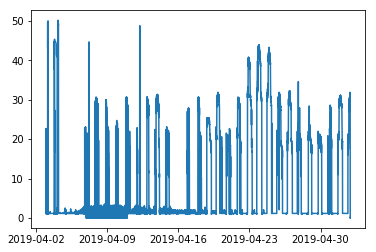

In [276]:
plt.plot(ener_25A4['datetime'],ener_25A4['energy_wh'])
plt.show()

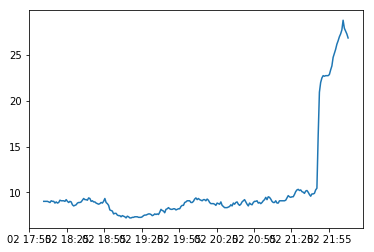

In [198]:
plt.plot(that_day_temp1['datetime'],that_day_temp1['value'])
plt.show()

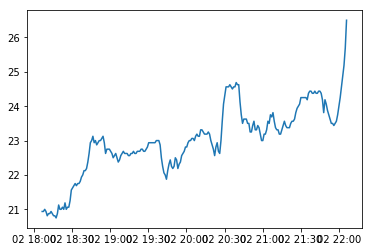

In [199]:
plt.plot(that_day_temp2['datetime'],that_day_temp2['value'])
plt.show()

In [ ]:
if this_value == 'None':
    this_value = 'NaN'
else: